In [245]:
#Import Dependencies 
import pandas as pd 
import numpy as np #making numpy arrays 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [246]:
#Loading the downloaded dataset into the pandas dataframe 
interview_data = pd.read_csv(r'C:\Users\USER\Desktop\interview_package\interview_dataset.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_9020\2375126717.py:2: DtypeWarning: Columns (102,116,128,142,154,180,194,246,343,359,367,380,484,615,725,737,806,827,857,859,999,1076,1191,1234,1263,1538,1541,1592,1593,1632,1679,1681,1723,1735,1770,1785,1804,1855,1857,2182,2230,2252,2368,2577,2580,2631,2632,2671,2742,2758,2784,2805,2858,2885,2927,3364,3372,3510,3540,3543,3557,3571,3628,3741,3788,3835,3863,3882,3920,3930,4006,4044,4053,4100,4157,4383,4402,4430,4506,4553,4929,4943,5005,5009,5013,5017,5077,5166,5174,5177,5222,5491,5504,5537,5736,5745,5845,5849,5855,5866,5878,5879,5901,5923,5931,5945,5967,5995,5996,6011,6017,6018,6075,6115,6118,6430,6440,6451,6475,6483,6525,6532,6703,6763,6808) have mixed types. Specify dtype option on import or set low_memory=False.
  interview_data = pd.read_csv(r'C:\Users\USER\Desktop\interview_package\interview_dataset.csv')


In [247]:
#Display the first five rows of the Interview dataset
interview_data.head()

SubmissionDate                starttime                  endtime  \
0   Aug 6, 2024 3:52:21 PM  Aug 6, 2024 11:50:32 AM  Aug 6, 2024 12:44:45 PM   
1   Aug 1, 2024 5:44:43 PM  Aug 1, 2024 11:36:23 AM  Aug 1, 2024 12:13:08 PM   
2  Aug 3, 2024 12:34:58 AM   Aug 2, 2024 4:13:56 PM   Aug 2, 2024 5:02:05 PM   
3   Aug 6, 2024 9:17:47 PM  Aug 6, 2024 10:44:39 AM  Aug 6, 2024 12:10:57 PM   
4   Aug 1, 2024 1:39:03 PM  Aug 1, 2024 12:20:03 PM   Aug 1, 2024 1:27:07 PM   

      version  duration  survey_start  intro_start  \
0  2408061513      3093           7.0          7.0   
1  2407311236      2003          62.0         62.0   
2  2408021241      2890           7.0          7.0   
3  2408061513      5178           5.0          5.0   
4  2407302157      4024           5.0          5.0   

                                          text_audit      date_collection  \
0  https://rtvuganda.surveycto.com/view/submissio...  2024-08-07 00:00:00   
1  https://rtvuganda.surveycto.com/view/submissio...  2024-08-02 00:00:00   
2  https://rtvuganda.surveycto.com/view/submissio...  2024-08-03 00:00:00   
3  https://rtvuganda.surveycto.com/view/submissio...  2024-08-07 00:00:00   
4  https://rtvuganda.surveycto.com/view/submissio...           2024-08-02   

   region  district  Surveyor_Name        Surveyor_Name2  survey_type  \
0       4         2             90  Owunyesiga Aloysious            1   
1       4         2             49        Akandinda Ivan            1   
2       4         2             65           Kato Mailet            1   
3       2         9             34           Kabibi Alex            1   
4       4         6            150      Kato Christopher            1   

  project_type      sid_2 sid_2_again pre_district pre_subcounty  pre_parish  \
0     Standard   SW_13848    SW_13848      Kanungu     Nyamirama  Nyakashure   
1          GAC   SW_22223    SW_22223      Kanungu           NaN         NaN   
2     Standard   SW_20406    SW_20406      Kanungu  Kanyantorogo     Kihembe   
3     Standard  KA-NO8464   KA-NO8464       Kaliro      Gadumire     Panyolo   
4     Standard    MW-6865     MW-6865     Kyenjojo       Kihuura      Matiri   

  pre_cluster    pre_village  pre_vid  pre_cohort pre_cycle  \
0  Nyakashure         Karoni      NaN        2019         A   
1   Rutugunda   Kanyankyende      NaN        2022         A   
2     Kihembe          Kyozi      NaN        2022         B   
3     Panyolo  Busiro_Tabina      NaN        2022         A   
4      Matiri        Mukwisi      NaN        2022         A   

             pre_name             pre_hhid treat_status    stream hh_category  \
0  Tibamukwera Kellen     KAN-19-HHIS12605    treatment  standard         NaN   
1       Kakuru Alfred    KAN-KAN-ALF-K6445    treatment       GAC         NaN   
2    Alex Turyasigura  KAN-KYO-ALE-M-17610    treatment  standard         NaN   
3     Noah Bamugabire   KAL-BUS-BAM-M-1064    treatment  standard         NaN   
4   Banyenzaki Banard  KYE-MUK-BAN-KY13425    treatment  standard         NaN   

  track_status  pre_check  status  name_correction first_name_corrected  \
0      Reserve          1       1                0                  NaN   
1      Reserve          1       1                0                  NaN   
2       target          1       1                1                 Alex   
3       Target          1       1                0                  NaN   
4       Target          1       1                0                  NaN   

  last_name_corrected       hhh_fullname  consent_1  consent_2  contact_keep  \
0                 NaN                NaN          1          1             1   
1                 NaN                NaN          1          1             1   
2        Turyasingura  Alex Turyasingura          1          1             1   
3                 NaN                NaN          1          1             1   
4                 NaN                NaN          1          1             1   

   refusing  refusing_1  

In [248]:
#Display the last five rows of the Interview dataset
interview_data.tail()

SubmissionDate                 starttime  \
495   Aug 1, 2024 6:21:55 PM   Aug 1, 2024 11:04:32 AM   
496   Aug 7, 2024 9:10:44 PM    Aug 7, 2024 1:02:35 PM   
497  Jul 30, 2024 7:22:54 PM  Jul 30, 2024 12:45:00 PM   
498  Jul 29, 2024 7:41:46 PM   Jul 29, 2024 2:09:08 PM   
499   Aug 5, 2024 9:07:41 PM    Aug 5, 2024 1:48:58 PM   

                     endtime     version  duration  survey_start  intro_start  \
495  Aug 1, 2024 12:00:03 PM  2407311236      3331           2.0          2.0   
496   Aug 7, 2024 2:06:50 PM  2408061513      3736          16.0         16.0   
497  Jul 30, 2024 3:53:20 PM  2407302157      3303           3.0          3.0   
498  Jul 29, 2024 3:26:55 PM  2407300828      4590           2.0          2.0   
499   Aug 5, 2024 2:45:51 PM  2408060510      3413           4.0          4.0   

                                            text_audit      date_collection  \
495  https://rtvuganda.surveycto.com/view/submissio...           2024-08-02   
496  https://rtvuganda.surveycto.com/view/submissio...           2024-08-08   
497  https://rtvuganda.surveycto.com/view/submissio...  2024-07-31 00:00:00   
498  https://rtvuganda.surveycto.com/view/submissio...  2024-07-30 00:00:00   
499  https://rtvuganda.surveycto.com/view/submissio...  2024-08-06 00:00:00   

     region  district  Surveyor_Name            Surveyor_Name2  survey_type  \
495       4         4              4  Ainomugisa Sharon Flower            1   
496       4         7            243          Turinayo Promise            1   
497       4         3            271       Angelah Ainembabazi            1   
498       4         8            103   Kabwaga Veronica Amooti            1   
499       4         2             54           Asiimwe Bridget            1   

    project_type        sid_2  sid_2_again     pre_district pre_subcounty  \
495     Standard       MW-633       MW-633  Kagadi_Standard    Rugashaari   
496     Standard  SWMT-AY5343  SWMT-AY5343          Rubanda       Bufundi   
497     Standard     SW_60878     SW_60878        Rukungiri   Nyakishenyi   
498          NaN    MW-116802    MW-116802          Kibaale       Kasimbi   
499     Standard      SW_9419      SW_9419          Kanungu        Mpungu   

    pre_parish pre_cluster   pre_village  pre_vid  pre_cohort pre_cycle  \
495     Ndeeba      Ndeeba      Ndeeba_B      NaN        2022         B   
496    Kagunga     Ruhungu        Muziku      NaN        2022         B   
497  Rwanyundo      Bugoro    Shogashoga   1073.0        2022         B   
498     Kasozi      Kasozi  Kitooro_West      NaN        2022         A   
499    Karambi       Ngara    Bushegenyi      NaN        2019         A   

                pre_name                 pre_hhid treat_status    stream  \
495           Amidu Vita      KAG-NDE-AMI-M-42389    treatment  standard   
496        Ayireti Norah      RUB-MUZ-AYI-F-10893    treatment  standard   
497  Nicholas Akanduhura      RUK-SHO-NIC-M-32804    treatment  standard   
498   Charleas Byamukama  KIB-KIT-CHA-M-110624-11      control       NaN   
499   Kyorimpa Clemensia         KAN-19-HHIS10277    treatment  standard   

    hh_category track_status  pre_check  status  name_correction  \
495         NaN       Target          1       1                0   
496         NaN       Target          1       1                0   
497         NaN       Target          1       1                0   
498         NaN      Reserve          1       1                0   
499         NaN       target          1       1                0   

    first_name_corrected last_name_corrected hhh_fullname  consent_1  \
495                  NaN                 NaN          NaN          1   
496                  NaN                 NaN          NaN          1   
497                  NaN                 NaN          NaN          1   
498                  NaN                 NaN          NaN          1   
499                  NaN                 NaN          NaN          1   

     consent_2 

In [249]:
#Print the number of rows and columns 
interview_data.shape

(500, 6905)

In [250]:
# Selecting columns to be used in model training(Key variables)
selected_columns = [
    'HH Income + Production/Day (USD)', 
    'most_recommend_rtv_program',
    'least_recommend_rtv_program',
    'most_recommend_rtv_program_reason',
    'least_recommend_rtv_program_reason'
]

selected_data = interview_data.loc[:, selected_columns].copy(deep=True)



In [251]:
#Identifying datatypes of missing selected data
selected_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HH Income + Production/Day (USD)    500 non-null    float64
 1   most_recommend_rtv_program          380 non-null    float64
 2   least_recommend_rtv_program         380 non-null    float64
 3   most_recommend_rtv_program_reason   380 non-null    object 
 4   least_recommend_rtv_program_reason  380 non-null    object 
dtypes: float64(3), object(2)
memory usage: 19.7+ KB


In [252]:
1.	
#checking missing values 
selected_data.isnull().sum()

HH Income + Production/Day (USD)        0
most_recommend_rtv_program            120
least_recommend_rtv_program           120
most_recommend_rtv_program_reason     120
least_recommend_rtv_program_reason    120
dtype: int64

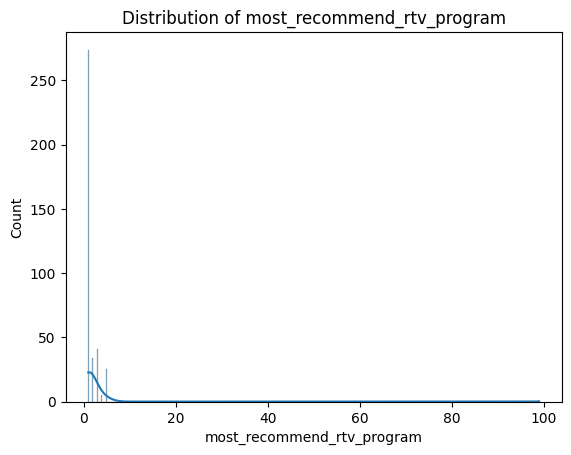

In [253]:
#Checking the distribution data in most_recommend_rtv_program to identify if to impute using mean or median
# Plotting distribution of 'most_recommend_rtv_program'
sns.histplot(selected_data['most_recommend_rtv_program'].dropna(), kde=True)
plt.title("Distribution of most_recommend_rtv_program")
plt.show()

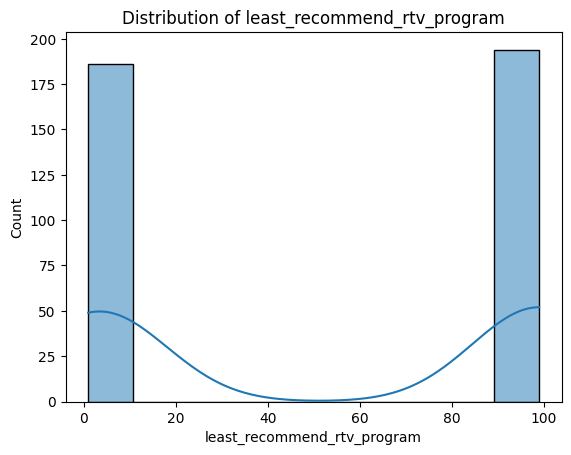

In [254]:
#Checking the distribution data in least_recommend_rtv_program to identify if to impute using mean or median
# Plotting distribution of 'least_recommend_rtv_program'
sns.histplot(selected_data['least_recommend_rtv_program'].dropna(), kde=True)
plt.title("Distribution of least_recommend_rtv_program")
plt.show()

In [255]:
#Understanding the statistical distribution of selected data for the model 
selected_data.describe()

HH Income + Production/Day (USD)  most_recommend_rtv_program  \
count                        500.000000                  380.000000   
mean                           2.491505                    1.865789   
std                            1.525648                    5.126926   
min                            0.130914                    1.000000   
25%                            1.399759                    1.000000   
50%                            2.257867                    1.000000   
75%                            3.253091                    2.000000   
max                           11.836357                   99.000000   

       least_recommend_rtv_program  
count                   380.000000  
mean                     52.228947  
std                      47.837761  
min                       1.000000  
25%                       3.750000  
50%                      99.000000  
75%                      99.000000  
max                      99.000000

In [256]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HH Income + Production/Day (USD)    500 non-null    float64
 1   most_recommend_rtv_program          380 non-null    float64
 2   least_recommend_rtv_program         380 non-null    float64
 3   most_recommend_rtv_program_reason   380 non-null    object 
 4   least_recommend_rtv_program_reason  380 non-null    object 
dtypes: float64(3), object(2)
memory usage: 19.7+ KB


In [257]:
# Filling missing values in selected_data
selected_data['most_recommend_rtv_program'] = selected_data['most_recommend_rtv_program'].fillna(selected_data['most_recommend_rtv_program'].median(), inplace=True)
selected_data['least_recommend_rtv_program']= selected_data['least_recommend_rtv_program'].fillna(selected_data['least_recommend_rtv_program'].median(), inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_9020\2132242788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data['most_recommend_rtv_program'] = selected_data['most_recommend_rtv_program'].fillna(selected_data['most_recommend_rtv_program'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9020\2132242788.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method w

In [258]:

#Encoding categorical data for most_recommend_rtv_program_reason
# Fill missing text values with a placeholder
selected_data['most_recommend_rtv_program_reason']=selected_data['most_recommend_rtv_program_reason'].fillna("No Reason Provided")

# Using TF-IDF tranform text reasons to numeric data computable for machine learning
tfidf = TfidfVectorizer(max_features=100, stop_words='english') 
tfidf_matrix = tfidf.fit_transform(selected_data['most_recommend_rtv_program_reason'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
selected_data = pd.concat([selected_data, tfidf_df], axis=1)
selected_data.drop(columns=['most_recommend_rtv_program_reason'], inplace=True)

In [259]:
# Define the target variable
selected_data['at_risk'] = (selected_data['HH Income + Production/Day (USD)'] < 2).astype(int)

# Define features (X) and target (y)
X = selected_data.drop(columns=['HH Income + Production/Day (USD)', 'at_risk'])
y = selected_data['at_risk']

In [261]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

ValueError: could not convert string to float: "Water is least recommend because water is available in the village not far and clean (tap) thus having enough source of water that's why it's least recommended."

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

NameError: name 'y_pred' is not defined

In [ ]:
# Save the processed data to a CSV file
selected_data.to_csv('processed_data.csv', index=False)